In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from scipy.stats import pearsonr

In [ ]:
deals = pd.read_excel('new_Deals.xlsx')

In [ ]:
spend = pd.read_excel('new_Spend.xlsx')

**Evaluate the effectiveness of individual deal owners and ad campaigns in terms of number of deals processed, conversion rate, and total sales.**

See the deal owners by the number of deals, how many of them were successfully completed (Payment Done) and the amount of sales.
Divide the amounts by 1000 to simplify the visualizations
Let's calculate expenses on these deals and conversions on successful deals and canceled ones.

In [ ]:
# Подсчёт количества сделок и сумм продаж
deal_summary = deals.groupby('Deal Owner Name').apply(lambda x: pd.Series({
    'Total Deals': x['Id'].count(),
    'Stage Done': (x['Stage'] == 'Payment Done').sum(),
    'Lost Deals': (x['Stage'] == 'Lost').sum(),
    'Offer Total Amount, K': x['Offer Total Amount'].sum() / 1000,
}))

deal_summary

,Total Deals,Stage Done,Lost Deals,"Offer Total Amount, K"
Deal Owner Name,,,,
Alice Johnson,25.0,0.0,25.0,0.000
Amy Green,66.0,0.0,32.0,0.000
Ben Hall,1345.0,46.0,887.0,2030.800
Bob Brown,336.0,0.0,336.0,13.500
Cara Iverson,1056.0,27.0,710.0,912.000
Charlie Davis,2963.0,148.0,2126.0,3822.500
Diana Evans,1013.0,1.0,884.0,562.500
Eva Kent,459.0,18.0,221.0,554.300
George King,94.0,2.0,87.0,33.500


In [ ]:
# Calculating the conversion rate
deal_summary['Conversion Done %'] = deal_summary['Stage Done'] / deal_summary['Total Deals'] * 100
deal_summary['Conversion Lost %'] = deal_summary['Lost Deals'] / deal_summary['Total Deals'] * 100
deal_summary

,Total Deals,Stage Done,Lost Deals,"Offer Total Amount, K",Conversion Done %,Conversion Lost %
Deal Owner Name,,,,,,
Alice Johnson,25.0,0.0,25.0,0.000,0.000000,100.000000
Amy Green,66.0,0.0,32.0,0.000,0.000000,48.484848
Ben Hall,1345.0,46.0,887.0,2030.800,3.420074,65.947955
Bob Brown,336.0,0.0,336.0,13.500,0.000000,100.000000
Cara Iverson,1056.0,27.0,710.0,912.000,2.556818,67.234848
Charlie Davis,2963.0,148.0,2126.0,3822.500,4.994938,71.751603
Diana Evans,1013.0,1.0,884.0,562.500,0.098717,87.265548
Eva Kent,459.0,18.0,221.0,554.300,3.921569,48.148148
George King,94.0,2.0,87.0,33.500,2.127660,92.553191


In [ ]:
# Sorting data by Offer Total Amount
deal_summary_sorted = deal_summary.sort_values(by='Offer Total Amount, K', ascending=False)
deal_summary_sorted.head(5)

,Total Deals,Stage Done,Lost Deals,"Offer Total Amount, K",Conversion Done %,Conversion Lost %
Deal Owner Name,,,,,,
Ulysses Adams,2165.0,141.0,1411.0,5106.800,6.512702,65.173210
Charlie Davis,2963.0,148.0,2126.0,3822.500,4.994938,71.751603
Julia Nelson,2241.0,93.0,1536.0,3575.311,4.149933,68.540830
Paula Underwood,1862.0,93.0,1318.0,2842.000,4.994629,70.784103
Victor Barnes,1232.0,44.0,821.0,2196.800,3.571429,66.639610


In [ ]:
# Sorting data by Total Deals
deal_summary_sorted_deals = deal_summary.sort_values(by='Total Deals', ascending=False)
deal_summary_sorted_deals.head(5)

,Total Deals,Stage Done,Lost Deals,"Offer Total Amount, K",Conversion Done %,Conversion Lost %
Deal Owner Name,,,,,,
Charlie Davis,2963.0,148.0,2126.0,3822.500,4.994938,71.751603
Julia Nelson,2241.0,93.0,1536.0,3575.311,4.149933,68.540830
Ulysses Adams,2165.0,141.0,1411.0,5106.800,6.512702,65.173210
Quincy Vincent,1884.0,65.0,1379.0,1788.900,3.450106,73.195329
Paula Underwood,1862.0,93.0,1318.0,2842.000,4.994629,70.784103


According to the sorted data we can say that among managers there are 3 leaders in the amount of sales and in the number of processed transactions - Charlie Davis, Julia Nelson, Ulysses Adams

<ipython-input-9-16c5b4ad03a7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-9-16c5b4ad03a7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


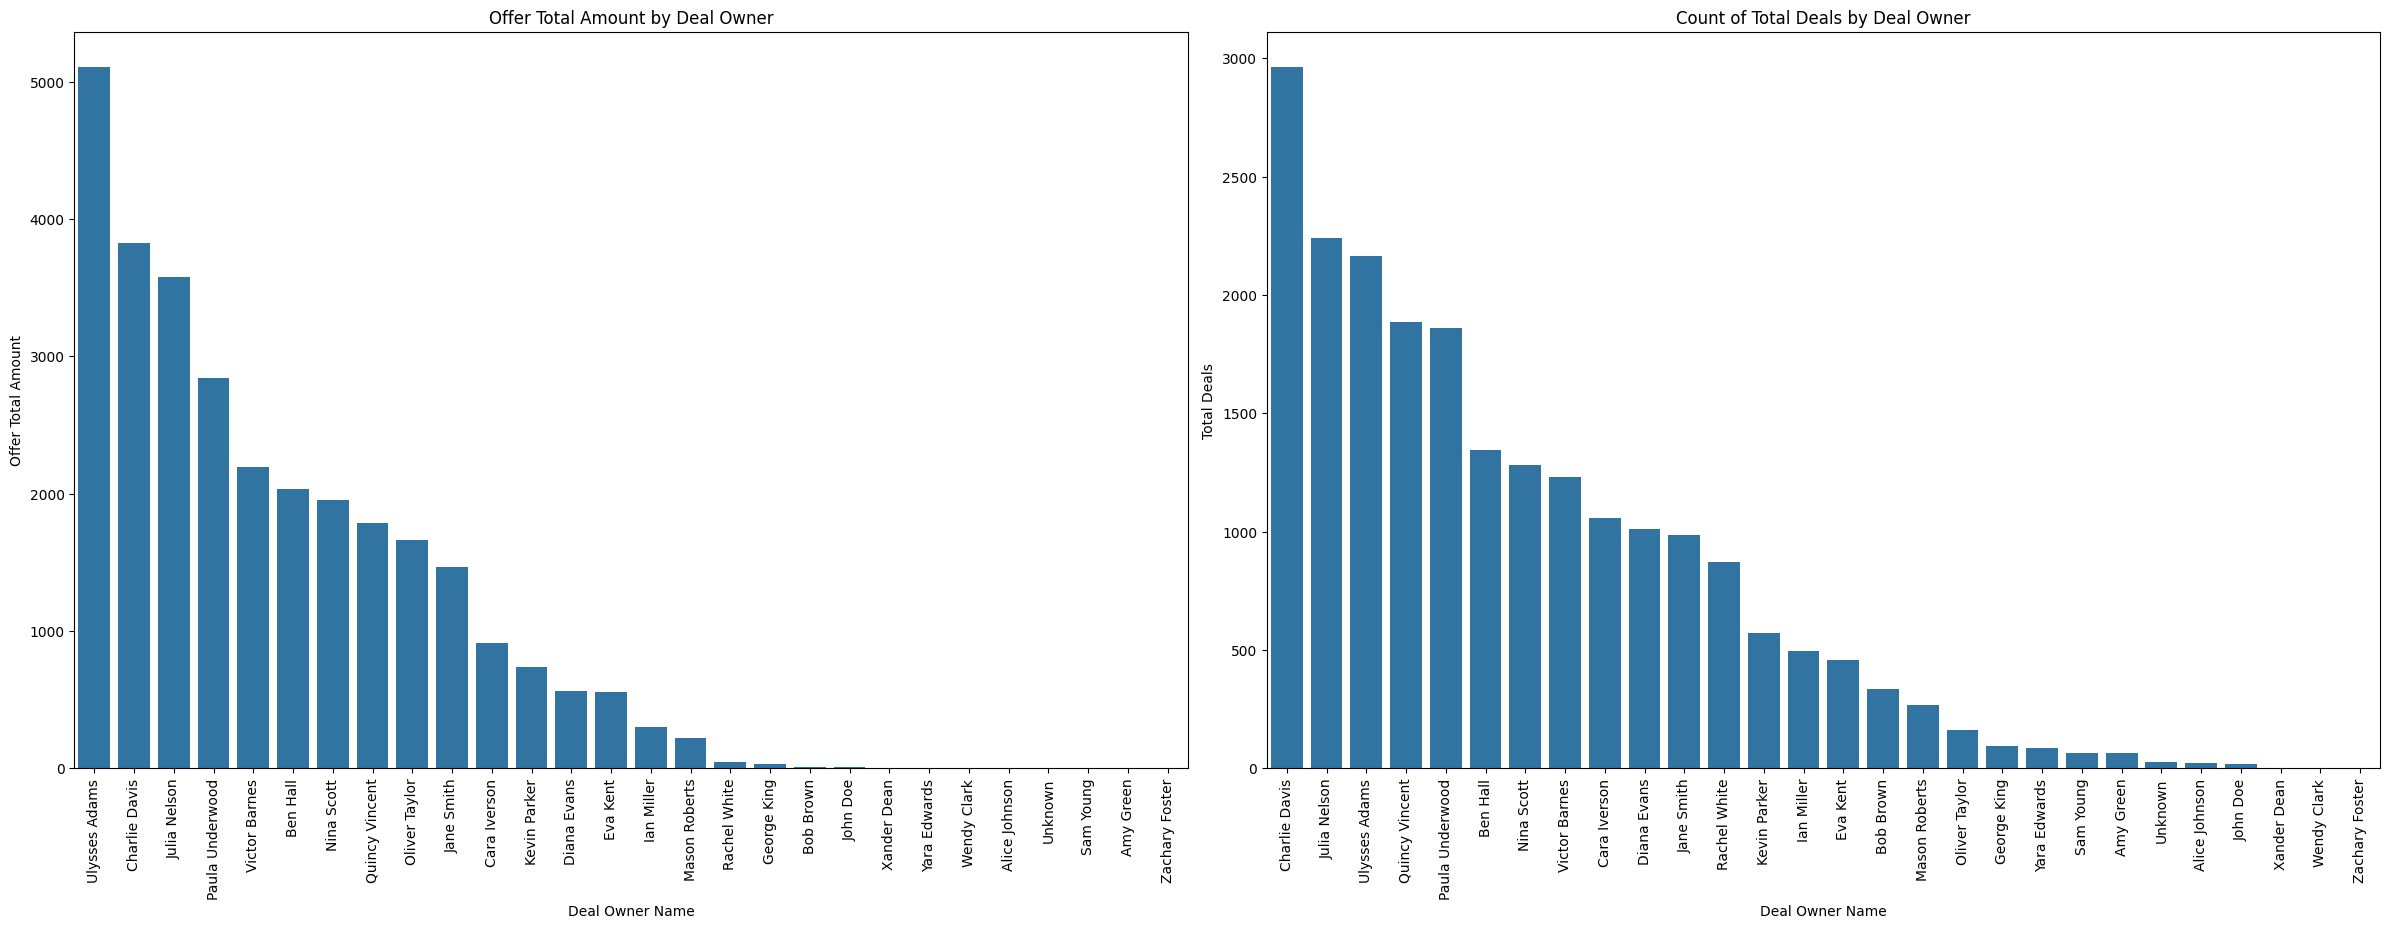

In [ ]:
fig = plt.figure(figsize=(24, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[3, 1])

# Subplot 1: Offer Total Amount by Deal Owner
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(x='Deal Owner Name', y='Offer Total Amount, K', data=deal_summary_sorted, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Offer Total Amount by Deal Owner')
ax1.set_ylabel('Offer Total Amount')

# Subplot 2: Count of Total Deals by Deal Owner
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(x='Deal Owner Name', y='Total Deals', data=deal_summary_sorted_deals, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Count of Total Deals by Deal Owner')
ax2.set_ylabel('Total Deals')

plt.tight_layout()
plt.show()

<ipython-input-10-90c30b3cbfd8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


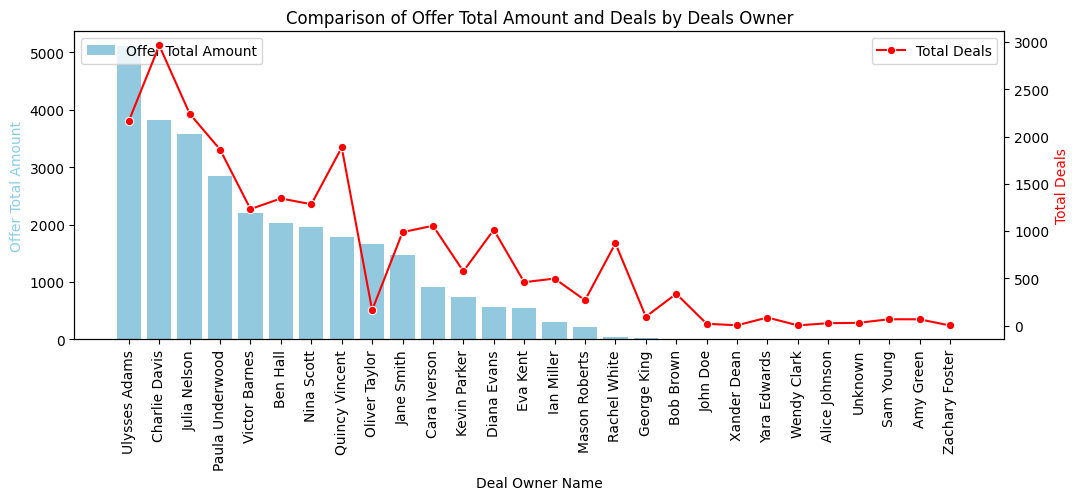

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))
sns.barplot(x='Deal Owner Name', y='Offer Total Amount, K', data=deal_summary_sorted, ax=ax1, color='skyblue', label='Offer Total Amount')
ax2 = ax1.twinx()
sns.lineplot(x='Deal Owner Name', y='Total Deals', data=deal_summary_sorted, ax=ax2, color='red', marker='o', label='Total Deals')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Deal Owner Name')
ax1.set_ylabel('Offer Total Amount', color='skyblue')
ax2.set_ylabel('Total Deals', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Comparison of Offer Total Amount and Deals by Deals Owner')
plt.show()

**A general pattern can be seen:** the more deals closed, the greater the total amount of sales.

The graph shows that the total amount of offers usually correlates with the number of deals, but there are exceptions that can be used to improve the performance of less successful deal owners, for example, the success of leaders - Charlie Davis, Julia Nelson, Ulysses Adams

In [ ]:
fig = px.scatter(deal_summary,
                 x='Total Deals',
                 y='Offer Total Amount, K',
                 size='Conversion Done %',
                 color=deal_summary.index,
                 title='Count of Deals vs Offer Total Amount',
                 labels={'Total Deals': 'Count of Deals', 'Offer Total Amount, K': 'Offer Total Amount, K'})

fig.show()

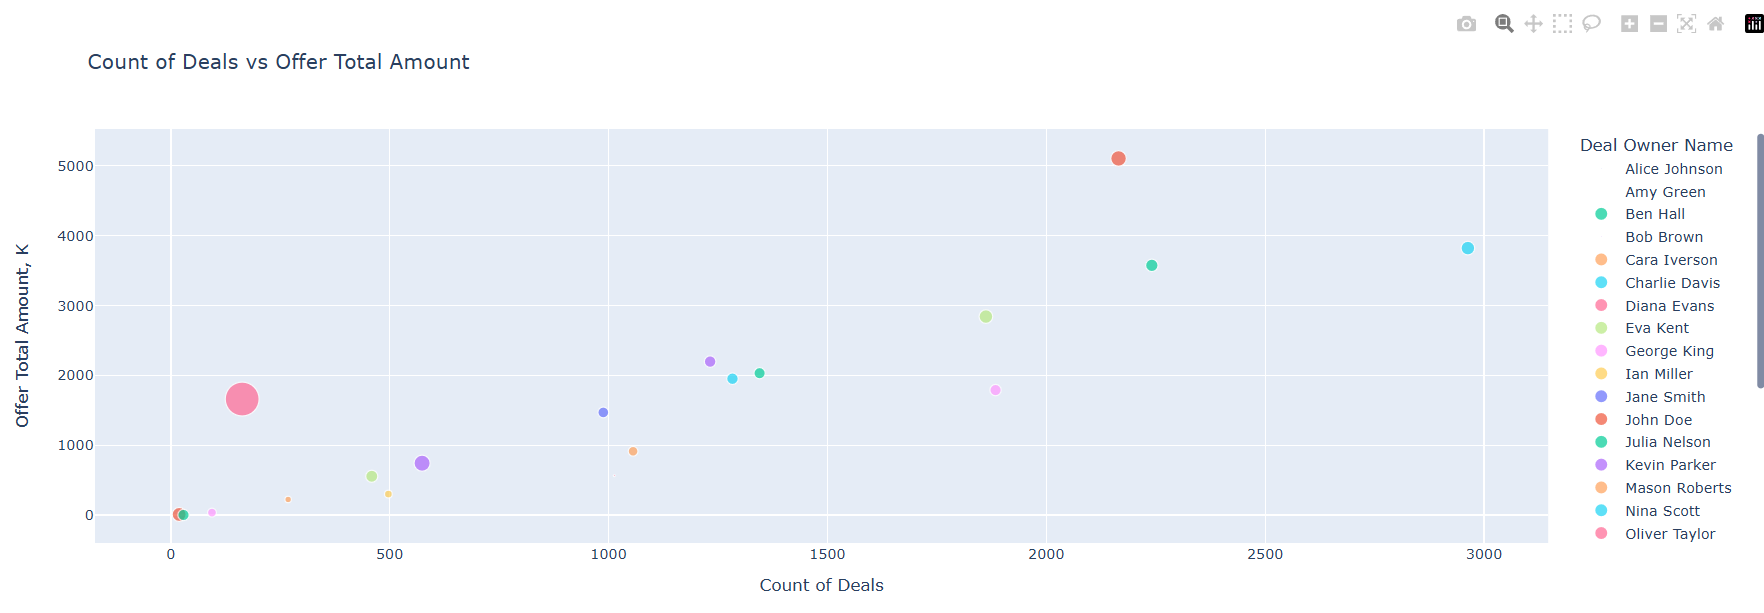

Owners such as **Charlie Davis (2,963 transactions) and Ulysses Adams (2,165 transactions)** have a high number of transactions and high sales amounts.
**Ben Hall and Victor Barnes** show fewer deals compared to the aforementioned owners, but the sales amounts are also significant.
**Bob Brown, Amy Green, Alice Johnson** are owners with lower sales amounts and low number of transactions that are closer to the axes.

There are a few owners with anomalous values, such as **Oliver Taylor** who has relatively few transactions (163) but a significant amount of sales (1660.5K). This may indicate that his trades have a large monetary value.

The visualization helps you see the different strategies among the owners: some are focused on deal volume, while others are focused on high sales amounts.
To analyze the performance of each deal owner, it is also worth considering additional metrics such as the percentage of completed deals and the profit/loss on each deal.

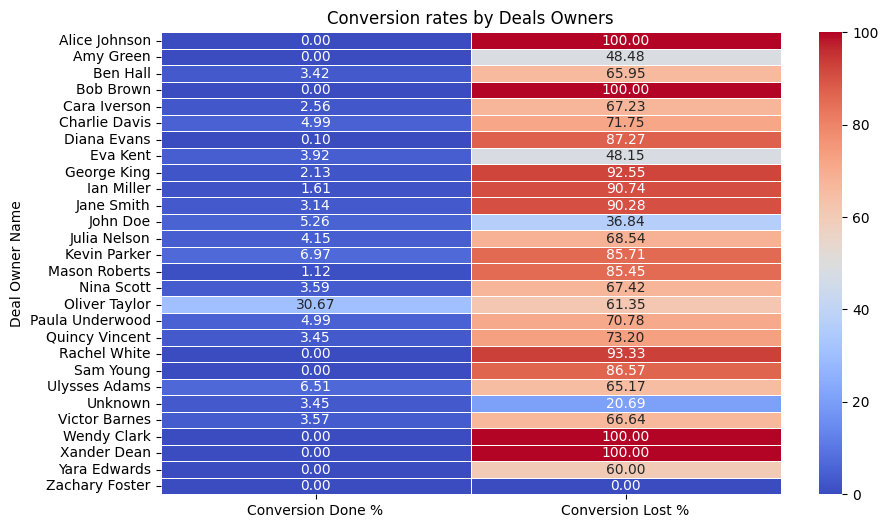

In [ ]:
# Create a summary table
pivot_table = deal_summary.pivot_table(index='Deal Owner Name', values=['Conversion Done %', 'Conversion Lost %'], aggfunc='mean')

# Creating a schedule
plt.figure(figsize=(10, 6))

# Heat map for conversion rates
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, linewidths=0.5)

plt.title('Conversion rates by Deals Owners')

plt.show()

**Analysis by advertising campaigns**

In [ ]:
# Amount of sales and expenses by managers and advertising campaigns
owner_deal_campaign_summary = deals.groupby(['Deal Owner Name', 'Campaign']).apply(lambda x: pd.Series({
    'Offer Total Amount, K': x['Offer Total Amount'].sum() / 1000,
    'Stage Done': (x['Stage'] == 'Payment Done').sum(),
})).reset_index()

owner_deal_campaign_summary.head()

,Deal Owner Name,Campaign,"Offer Total Amount, K",Stage Done
0,Alice Johnson,Unknown,0.0,0.0
1,Alice Johnson,performancemax_digitalmarkt_ru_DE,0.0,0.0
2,Alice Johnson,wide_DE,0.0,0.0
3,Alice Johnson,women,0.0,0.0
4,Alice Johnson,work_DE,0.0,0.0


To consider positive transactions and to correctly display total sales by manager and campaign, let's filter the table and exclude zeros and Unknowns at all levels of the hierarchy

In [ ]:
df_filtered = owner_deal_campaign_summary[
    (owner_deal_campaign_summary['Offer Total Amount, K'] > 0) &
    (owner_deal_campaign_summary['Deal Owner Name'] != 'Unknown') &
    (owner_deal_campaign_summary['Campaign'] != 'Unknown')
]

In [ ]:
fig = px.sunburst(df_filtered,
                  path=['Deal Owner Name', 'Campaign'],
                  values='Offer Total Amount, K',
                  title="Deal Owner, Campaign, Offer Total Amount, K",
                  color='Offer Total Amount, K',
                  color_continuous_scale='RdBu',
                  height=600
                 )

fig.show()

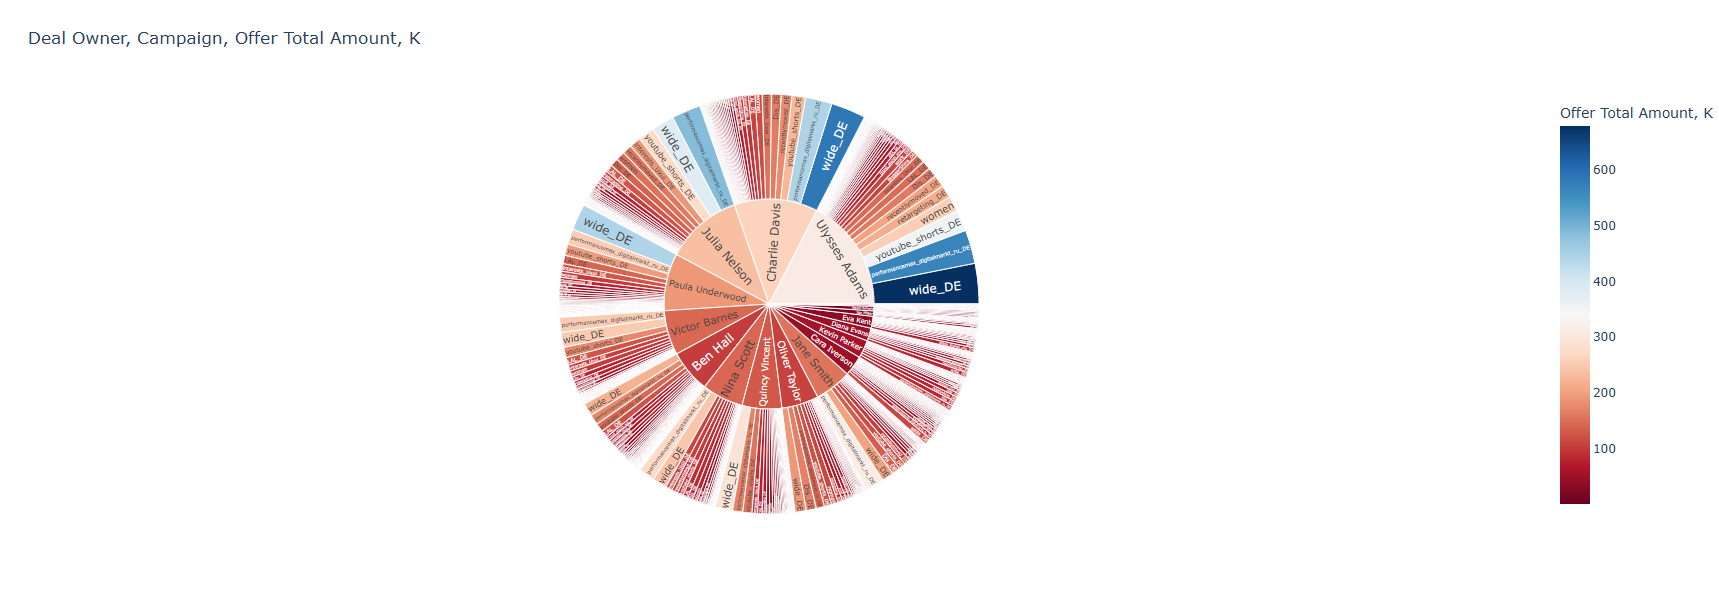

each branch of the diagram is associated with a specific amount of sales. On the right side of the diagram is a scale that shows the range of values from low (100K) to high (600K).

Thus, this diagram makes it easy to see the sales amounts that managers have made and for which campaigns.

In [ ]:
# Amount of sales and expenses on advertising campaigns
deal_campaign = deals.groupby('Campaign').apply(lambda x: pd.Series({
    'Total Deals': x['Id'].count(),
    'Offer Total Amount, K': x['Offer Total Amount'].sum() / 1000,
    'Stage Done': (x['Stage'] == 'Payment Done').sum(),
    'Lost Deals': (x['Stage'] == 'Lost').sum()
})).reset_index()

deal_campaign


,Campaign,Total Deals,"Offer Total Amount, K",Stage Done,Lost Deals
0,1performancemax_wide_PL,261.0,42.0,4.0,251.0
1,2day_DE,9.0,0.0,0.0,9.0
2,ASA_de_DE,112.0,247.0,5.0,72.0
3,Akademia,7.0,11.5,1.0,2.0
4,Aussiedler_DE,6.0,16.0,1.0,4.0
...,...,...,...,...,...
125,work_wr,6.0,0.0,0.0,6.0
126,workingin_DE,48.0,42.0,0.0,43.0
127,yo_DE,13.0,11.5,0.0,11.0
128,youtube_shorts_DE,1635.0,2018.1,53.0,1322.0


In [ ]:
# grouping of expenditure data
spend_summary = spend.groupby('Campaign').agg({'Spend': lambda x: x.sum() / 1000}).rename(columns={'Spend': 'Spend, K'})
spend_summary

,"Spend, K"
Campaign,
1performancemax_wide_PL,2.96138
LAL_DE,4.20037
LAL_ab__PL,0.16763
Unknown,27.88768
_widde_PL,0.67043
b_DE,1.25650
bbo_DE,0.20000
berlin_dd_DE,0.17989
blog2_DE,0.77300


In [ ]:
deal_campaign_summary = deal_campaign.merge(spend_summary,
                                            on='Campaign',
                                            how='left')
deal_campaign_summary

,Campaign,Total Deals,"Offer Total Amount, K",Stage Done,Lost Deals,"Spend, K"
0,1performancemax_wide_PL,261.0,42.0,4.0,251.0,2.96138
1,2day_DE,9.0,0.0,0.0,9.0,NaN
2,ASA_de_DE,112.0,247.0,5.0,72.0,NaN
3,Akademia,7.0,11.5,1.0,2.0,NaN
4,Aussiedler_DE,6.0,16.0,1.0,4.0,NaN
...,...,...,...,...,...,...
125,work_wr,6.0,0.0,0.0,6.0,NaN
126,workingin_DE,48.0,42.0,0.0,43.0,NaN
127,yo_DE,13.0,11.5,0.0,11.0,NaN
128,youtube_shorts_DE,1635.0,2018.1,53.0,1322.0,14.14922


Since there are 130 campaigns, let's analyze the top 10 companies by sales. Unknown campaigns - we will remove them from the analysis

In [ ]:
# Top 10 advertising campaigns
top_10_campaigns = deal_campaign_summary.loc[deal_campaign_summary['Campaign'] != 'Unknown'].sort_values(
    by='Offer Total Amount, K',
    ascending=False
    ).head(10)

top_10_campaigns

,Campaign,Total Deals,"Offer Total Amount, K",Stage Done,Lost Deals,"Spend, K"
116,wide_DE,2662.0,3860.900,105.0,2168.0,18.52279
87,performancemax_digitalmarkt_ru_DE,2653.0,3333.600,112.0,2335.0,NaN
128,youtube_shorts_DE,1635.0,2018.100,53.0,1322.0,14.14922
16,Dis_DE,581.0,1228.800,30.0,506.0,NaN
70,interests_Uxui_DE,531.0,1221.300,27.0,421.0,3.75306
121,women,612.0,1162.698,31.0,474.0,4.21975
96,recentlymoved_DE,750.0,1135.600,31.0,597.0,4.52331
21,LAL_DE,542.0,1056.500,28.0,377.0,4.20037
98,retargeting_DE,479.0,980.400,17.0,373.0,2.81729
124,work_DE,317.0,563.000,10.0,254.0,NaN


<ipython-input-49-8dc918c4373b>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



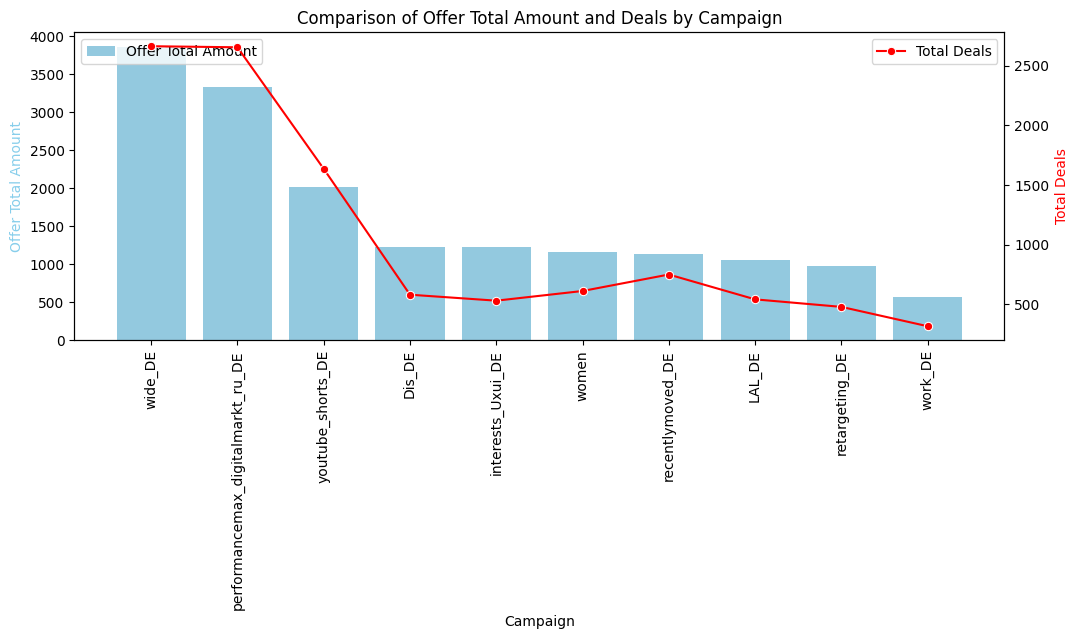

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))
sns.barplot(x='Campaign', y='Offer Total Amount, K', data=top_10_campaigns, ax=ax1, color='skyblue', label='Offer Total Amount')
ax2 = ax1.twinx()
sns.lineplot(x='Campaign', y='Total Deals', data=top_10_campaigns, ax=ax2, color='red', marker='o', label='Total Deals')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Campaign')
ax1.set_ylabel('Offer Total Amount', color='skyblue')
ax2.set_ylabel('Total Deals', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Comparison of Offer Total Amount and Deals by Campaign')
plt.show()

As the number of transactions decreases, so does the total amount of sales


In [ ]:
data_graf = deal_campaign_summary.loc[deal_campaign_summary['Campaign'] != 'Unknown']
data_graf

,Campaign,Total Deals,"Offer Total Amount, K",Stage Done,Lost Deals,"Spend, K"
0,1performancemax_wide_PL,261.0,42.0,4.0,251.0,2.96138
1,2day_DE,9.0,0.0,0.0,9.0,NaN
2,ASA_de_DE,112.0,247.0,5.0,72.0,NaN
3,Akademia,7.0,11.5,1.0,2.0,NaN
4,Aussiedler_DE,6.0,16.0,1.0,4.0,NaN
...,...,...,...,...,...,...
125,work_wr,6.0,0.0,0.0,6.0,NaN
126,workingin_DE,48.0,42.0,0.0,43.0,NaN
127,yo_DE,13.0,11.5,0.0,11.0,NaN
128,youtube_shorts_DE,1635.0,2018.1,53.0,1322.0,14.14922


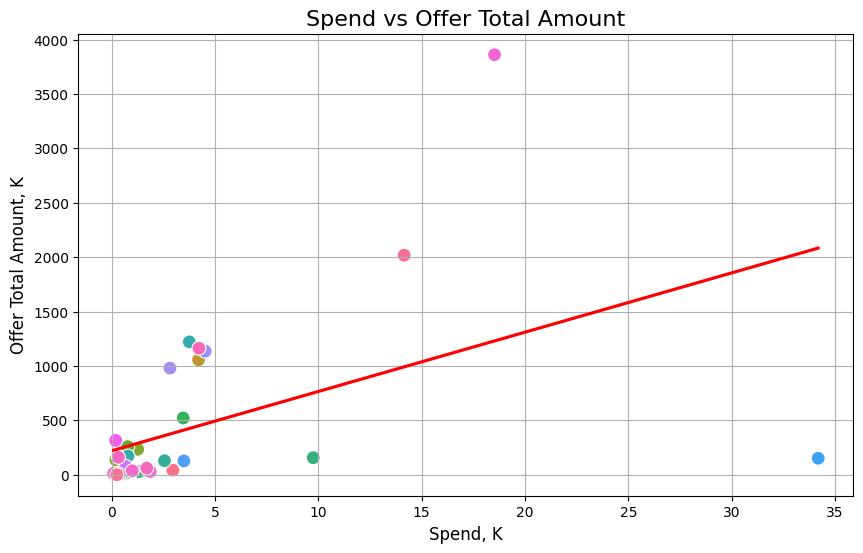

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spend, K', y='Offer Total Amount, K', data=data_graf, s=100, hue = data_graf['Campaign'], legend=False)

plt.title('Spend vs Offer Total Amount', fontsize=16)
plt.xlabel('Spend, K (тысяч $)', fontsize=12)
plt.ylabel('Offer Total Amount, K', fontsize=12)

# Trendline
sns.regplot(x='Spend, K', y='Offer Total Amount, K', data=data_graf, scatter=False, color='red', ci=None)

plt.grid(True)
plt.show()

There is a **positive linear correlation**, indicating a general trend of increasing sales and increasing expenses. The more expenses, the more sales, on average.

In the lower left part of the graph, most of the points are concentrated close to each other, indicating low expenses and small sales. However, there are a few points that are significantly removed from the main body of the data.

**There are a few outliers:** for example, one point around 35K for expenses and low sales, which stands out from the general trend. This may be an anomaly or a special case.

**The trend line** confirms the presence of a positive correlation, although the scatter of the points shows that the relationship between the variables is not strictly linear - there are some deviations and possible outliers.
